In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

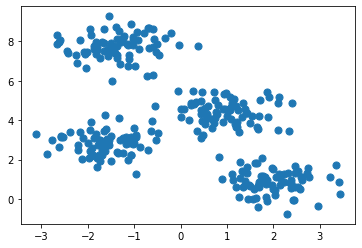

In [5]:
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples = 300,centers = 4,cluster_std = 0.60,random_state = 0)
plt.scatter(X[:,0],X[:,1],s= 50)

In [6]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [11]:
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3])

In [22]:
 from sklearn.metrics import pairwise_distances_argmin

pairwise_distances_argmin is a function in the scikit-learn library that can be used to find the indices of the closest points in one set of points to another set of points. It computes the distances between pairs of points in two arrays and returns an array of indices for the minimum distances found.\

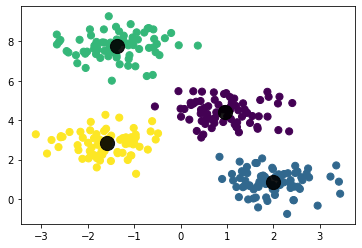

In [21]:
def find_clusters(X,n_clusters,rseed = 2):
    #1.Randomly choose clusters
    a = np.random.RandomState(rseed)
    i = a.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #2a.Assign labels based on closest center
        labels = pairwise_distances_argmin(X,centers)
        
        #2b.find new centers from means of points
        new_centers = np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        
        #2c.check for convergence
        if np.all(centers==new_centers):
            break
        centers = new_centers
    return centers,labels
centers,labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c = y_kmeans, s = 50,cmap = 'viridis')
plt.scatter(centers[:,0],centers[:,1],c = 'black',s = 200,alpha = 0.9)
